In [1]:
import numpy as np
# import cvxopt
import pandas as pd
# pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy


import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.preprocessing as preprocess
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
import statistics
from sklearn.ensemble import BaggingClassifier 
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.preprocessing import RobustScaler


In [2]:
data=pd.read_csv("/Users/sadafsafa/Desktop/final.csv")

In [3]:
data.head()

,Energy,Variance,Enthropy,Form Factor,Ouput
0,0.005331,0.000073,1.812607,1.067904,1
1,0.000244,0.000111,1.963357,1.086146,1
2,0.040782,0.000284,2.282827,1.919749,1
3,0.001448,0.000047,1.607245,1.154540,1
4,0.001074,0.000037,1.517099,1.089576,1


In [4]:
m_features=['Energy','Variance','Enthropy','Form Factor']

In [5]:
X=data[m_features]

In [6]:
X.describe()

,Energy,Variance,Enthropy,Form Factor
count,1.600000e+02,1.600000e+02,160.000000,160.000000
mean,1.056740e-02,8.601092e-04,1.999245,1.290977
std,1.581201e-02,4.115457e-03,0.762934,0.319874
min,8.626999e-07,8.225962e-07,0.119939,1.026371
25%,1.440931e-03,5.344334e-05,1.572832,1.090977
50%,4.895240e-03,1.712522e-04,2.095083,1.109952
75%,1.464660e-02,4.927604e-04,2.494998,1.257554
max,1.096858e-01,4.494825e-02,3.973464,2.301387


In [7]:
y=data.Ouput

In [8]:
x_shuffle, y_shuffle = shuffle(X, y, random_state=42)

In [9]:
  X_train, X_test, y_train, y_test = train_test_split(x_shuffle, y_shuffle, test_size=0.20,random_state=42) 

In [10]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [11]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# apply standardization on numerical features
for i in m_features:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [12]:
scaler = RobustScaler().fit(X_train)

X_train_rob=scaler.transform(X_train)
X_test_rob=scaler.transform(X_test)

In [13]:
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

acc=[]
knn = KNeighborsClassifier(n_neighbors=5)
# model fitting and measuring accurecy 
for i in range(len(trainX)):
    
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # RMSE
    acc.append(np.sqrt(accuracy_score(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'Acurrecy':acc},index=['Original','Normalized','Standardized'])
df_knn

,Acurrecy
Original,0.883883
Normalized,0.810093
Standardized,0.847791


In [14]:
svr = svm.SVC(kernel='poly',C=5)

rmse = []

for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(accuracy_score(y_test,pred)))

# visualizing the result    
df_svr = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_svr

,RMSE
Original,0.829156
Normalized,0.810093
Standardized,0.750000


In [15]:

#Create a svm Classifier
model1= svm.SVC(kernel='poly',C=22) # Linear Kernel
# model1=LogisticRegression(random_state=0)
#Train the model using the training sets
# scores=cross_val_score(model1, x_shuffle, y_shuffle, scoring='accuracy',cv=5)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
acc_svm=accuracy_score(y_test, y_pred1)
print('Accuracy: %.3f' % acc_svm)

Accuracy: 0.781


>1, train: 0.688, test: 0.750
>2, train: 0.719, test: 0.719
>3, train: 0.711, test: 0.688
>4, train: 0.719, test: 0.688
>5, train: 0.734, test: 0.688
>6, train: 0.734, test: 0.719
>7, train: 0.750, test: 0.750
>8, train: 0.758, test: 0.750
>9, train: 0.766, test: 0.750
>10, train: 0.766, test: 0.750
>11, train: 0.758, test: 0.750
>12, train: 0.766, test: 0.750
>13, train: 0.781, test: 0.750
>14, train: 0.781, test: 0.750
>15, train: 0.781, test: 0.750
>16, train: 0.773, test: 0.750
>17, train: 0.766, test: 0.750
>18, train: 0.766, test: 0.750
>19, train: 0.766, test: 0.750
>20, train: 0.766, test: 0.750
>21, train: 0.766, test: 0.750
>22, train: 0.766, test: 0.781
>23, train: 0.781, test: 0.781
>24, train: 0.781, test: 0.781
>25, train: 0.781, test: 0.781
>26, train: 0.781, test: 0.781
>27, train: 0.781, test: 0.781
>28, train: 0.781, test: 0.781
>29, train: 0.781, test: 0.781
>30, train: 0.781, test: 0.781
>31, train: 0.781, test: 0.781
>32, train: 0.781, test: 0.781
>33, train: 0.781

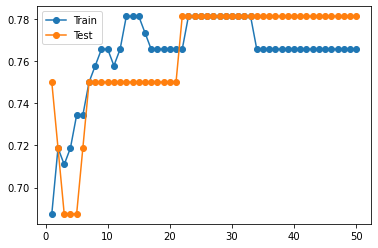

In [16]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_svm= svm.SVC(kernel='poly',C=i)
	# fit model on the training dataset
	model_svm.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model_svm.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_svm.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

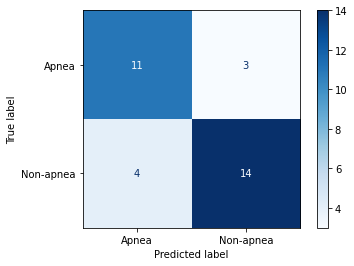

Accuracy :  0.78125
Sensitivity :  0.7857142857142857
Specificity :  0.7777777777777778


In [17]:
cm1= confusion_matrix(y_test,y_pred1)
class_names=['Apnea','Non-apnea']
plot_confusion_matrix(model1, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)  
plt.show()
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)


sen_svm= cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sen_svm)

spe_svm= cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', spe_svm)


In [18]:
print('SVM kernal: poly')
print(classification_report(y_test, y_pred1, target_names=class_names))

SVM kernal: poly
              precision    recall  f1-score   support

       Apnea       0.73      0.79      0.76        14
   Non-apnea       0.82      0.78      0.80        18

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32



In [23]:
model2= KNeighborsClassifier(n_neighbors=24)
model2.fit(X_train, y_train)
y_pred2= model2.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred2)
print('Accuracy: %.3f ' % acc_knn)
# accuracy_score(y_test, y_pred2)

Accuracy: 0.750 


>1, train: 1.000, test: 0.781
>2, train: 0.859, test: 0.719
>3, train: 0.875, test: 0.781
>4, train: 0.812, test: 0.719
>5, train: 0.812, test: 0.781
>6, train: 0.797, test: 0.594
>7, train: 0.758, test: 0.625
>8, train: 0.758, test: 0.594
>9, train: 0.773, test: 0.719
>10, train: 0.766, test: 0.656
>11, train: 0.758, test: 0.688
>12, train: 0.758, test: 0.656
>13, train: 0.742, test: 0.781
>14, train: 0.781, test: 0.719
>15, train: 0.773, test: 0.688
>16, train: 0.773, test: 0.688
>17, train: 0.758, test: 0.688
>18, train: 0.750, test: 0.656
>19, train: 0.750, test: 0.719
>20, train: 0.750, test: 0.719
>21, train: 0.742, test: 0.750
>22, train: 0.734, test: 0.688
>23, train: 0.742, test: 0.781
>24, train: 0.773, test: 0.750
>25, train: 0.758, test: 0.781
>26, train: 0.766, test: 0.750
>27, train: 0.773, test: 0.781
>28, train: 0.781, test: 0.781
>29, train: 0.758, test: 0.781
>30, train: 0.758, test: 0.781
>31, train: 0.750, test: 0.812
>32, train: 0.742, test: 0.781
>33, train: 0.727

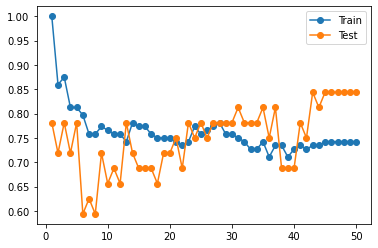

In [20]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

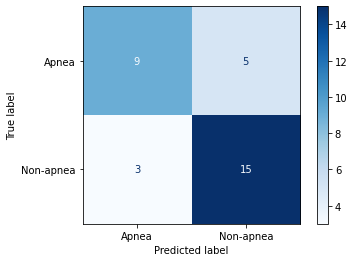

Accuracy :  0.75
Sensitivity :  0.6428571428571429
Specificity :  0.8333333333333334


In [24]:
cm2= confusion_matrix(y_test,y_pred2)
class_names=['Apnea','Non-apnea']
plot_confusion_matrix(model2, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)  
plt.show()

total1=sum(sum(cm2))
accuracy1=(cm2[0,0]+cm2[1,1])/total1

print ('Accuracy : ', accuracy1)

sen_knn= cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sen_knn)

spe_knn= cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', spe_knn)


In [25]:
models = pd.DataFrame({
    'Model': ['SVM', 'KNN'],
    'Score': [acc_svm, acc_knn],
    'Sensitivity':[sen_svm,sen_knn],
    'Specificity':[spe_svm,spe_knn]
    })
models
# models.sort_values(by='Score', ascending=False)

,Model,Score,Sensitivity,Specificity
0,SVM,0.78125,0.785714,0.777778
1,KNN,0.75000,0.642857,0.833333
